## 네이버쇼핑과 날씨와의 관계
### 1. 데이터 로딩

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT A.productcid
                ,A.productcname
                ,A.level
                ,A.productpath
                ,B.dt
                ,B.productvalue

        FROM NaverShopProductCode2 AS A
        INNER JOIN NaverShopProductRate AS B
        ON A.productcid = B.productcid
        WHERE 1 = 1
        AND B.dt BETWEEN '20181101' AND '20201031'         
--        AND B.dt BETWEEN '20191101' AND '20201031'

    '''
    cur.execute(sql)
    result_naverShopping = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_naverShopping))

마리아에서 불러온 행 수 : 1783448


In [2]:
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *

        FROM ASOS_Weather_D
        WHERE 1 = 1
        AND DATE BETWEEN '2018-11-01' AND '2020-10-31'         
--        AND DATE BETWEEN '2019-11-01' AND '2020-10-31'

    '''
    cur.execute(sql)
    result_weather = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_weather))

마리아에서 불러온 행 수 : 12216


In [3]:
# 기간 : 20191101 ~ 20201031
naverShopping = pd.DataFrame(result_naverShopping)
dtweather = pd.DataFrame(result_weather)
dtweather.rename(columns = {'date' : 'dt'}, inplace = True)

In [4]:
# display(naverShopping.describe(include='all'))
# display(dtweather.describe(include='all'))

In [5]:
# 날짜 format 맞추기
naverShopping['newdt'] = naverShopping['dt'].apply(lambda x : x[0:4] + '-' + x[4:6] + '-' + x[6:8])  
display(naverShopping.head(2))
del naverShopping['dt']
naverShopping.rename(columns = {'newdt' : 'dt'}, inplace = True)
display(naverShopping.head(2))

,productcid,productcname,level,productpath,dt,productvalue,newdt
0,50000000,패션의류,L1,패션의류,20181101,85.3540,2018-11-01
1,50000001,패션잡화,L1,패션잡화,20181101,58.6638,2018-11-01


,productcid,productcname,level,productpath,productvalue,dt
0,50000000,패션의류,L1,패션의류,85.3540,2018-11-01
1,50000001,패션잡화,L1,패션잡화,58.6638,2018-11-01


In [6]:
# naverShopFaFo = naverShopping[naverShopping['productcname'].isin(['패션의류', '식품'])] 
# naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2'])]
naverShopFaFo = naverShopping
# naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2']) & naverShopping['productcname'].isin(['향수'])] 
print(naverShopFaFo.head())
print(naverShopFaFo.count())


print(naverShopFaFo.info())

  productcid productcname level productpath  productvalue          dt
0   50000000         패션의류    L1        패션의류       85.3540  2018-11-01
1   50000001         패션잡화    L1        패션잡화       58.6638  2018-11-01
2   50000002       화장품/미용    L1      화장품/미용       71.2651  2018-11-01
3   50000003       디지털/가전    L1      디지털/가전       71.5439  2018-11-01
4   50000004      가구/인테리어    L1     가구/인테리어       72.0787  2018-11-01
productcid      1783448
productcname    1783448
level           1783448
productpath     1783448
productvalue    1783448
dt              1783448
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783448 entries, 0 to 1783447
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   productcid    object 
 1   productcname  object 
 2   level         object 
 3   productpath   object 
 4   productvalue  float64
 5   dt            object 
dtypes: float64(1), object(5)
memory usage: 81.6+ MB
None


In [7]:
naverShop = naverShopFaFo.pivot(index='dt', columns='productpath', values='productvalue')
display(naverShop.head())
display(naverShop.tail())
display(naverShop.count())


productpath,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 리모델링,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,가구/인테리어 > DIY자재/용품 > 반제품,가구/인테리어 > DIY자재/용품 > 벽지,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
dt,,,,,,,,,,,,,,,,,,,,,
2018-11-01,72.0787,92.8073,65.6798,97.6212,NaN,77.0726,60.4663,63.6696,54.6898,100.0000,...,65.5992,33.7352,54.0078,85.6928,10.35590,61.4510,27.0211,61.7787,24.1213,41.4314
2018-11-02,63.8732,67.3584,61.3935,68.8464,NaN,68.2782,55.3439,56.9613,47.6182,29.3138,...,55.9791,31.2057,43.0709,70.4585,9.96976,53.9569,23.7496,55.5679,22.7592,38.2272
2018-11-03,64.4767,60.2473,54.6524,65.0165,NaN,57.0002,46.6426,51.8255,42.9099,24.7036,...,54.3102,30.7801,36.8365,68.6449,9.40683,53.0049,22.1453,54.3533,21.0677,34.9836
2018-11-04,81.8429,73.4122,61.6996,76.9012,NaN,70.5674,52.7007,58.7528,57.0347,39.1889,...,67.5956,42.5768,49.2341,85.6352,10.94210,67.5329,24.6618,65.8540,23.8137,43.9396
2018-11-05,81.2188,82.6391,74.0742,85.2774,NaN,85.8229,67.2632,70.4070,62.7954,34.8441,...,76.8105,42.5059,54.7203,94.2362,35.25000,66.7298,30.2925,72.2872,26.1423,49.1792


productpath,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 리모델링,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,가구/인테리어 > DIY자재/용품 > 반제품,가구/인테리어 > DIY자재/용품 > 벽지,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
dt,,,,,,,,,,,,,,,,,,,,,
2020-10-27,66.8088,72.6855,75.3323,68.5516,84.3125,60.5200,71.1946,66.3980,56.5068,62.5101,...,75.6502,63.9347,71.0828,74.0827,68.0168,71.7296,42.9494,77.5919,39.4061,48.2323
2020-10-28,64.7570,70.2546,71.9751,64.0441,81.2129,57.0548,70.0072,62.6920,56.4212,60.8145,...,73.7398,60.1218,71.4552,74.3224,68.2853,67.8523,39.1854,71.1242,37.8812,45.9088
2020-10-29,61.8701,67.7218,69.7469,64.6774,78.8964,54.6964,68.3591,63.0157,56.3142,56.1243,...,70.1223,59.1785,69.1902,67.0882,67.8881,67.0345,41.1517,72.2356,36.2761,43.3104
2020-10-30,54.5494,60.2699,61.5359,56.8544,71.9505,46.7818,56.7305,54.6590,51.2628,50.3653,...,62.1887,49.0566,54.6075,54.8102,77.1301,63.4471,35.3652,63.0597,31.7817,38.8632
2020-10-31,58.0721,57.1073,56.7058,54.2542,74.8497,42.0204,52.1752,52.2147,47.0890,46.8792,...,63.6074,51.2382,56.3140,59.1545,74.9259,61.0282,38.3427,61.6594,33.5072,39.4379


productpath
가구/인테리어                       731
가구/인테리어 > DIY자재/용품            731
가구/인테리어 > DIY자재/용품 > 가구부속품    731
가구/인테리어 > DIY자재/용품 > 데코스티커    731
가구/인테리어 > DIY자재/용품 > 리모델링      89
                             ... 
화장품/미용 > 헤어케어 > 트리트먼트         731
화장품/미용 > 헤어케어 > 헤어미스트         731
화장품/미용 > 헤어케어 > 헤어에센스         731
화장품/미용 > 헤어케어 > 헤어케어세트        731
화장품/미용 > 헤어케어 > 헤어팩           731
Length: 2507, dtype: int64

In [8]:
import numpy as np

display(dtweather.head(2))
# seoulWeather = dtweather[dtweather['city'].isin(['서울특별시', '울산광역시'])]
seoulWeather = dtweather[dtweather['city'].isin(['서울특별시'])]
display(seoulWeather.head(2))
display(seoulWeather.count())


# bins
# count, bin_dividers = np.histogram(seoulWeather['amount_of_rain'], bins=10)
# print(seoulWeather['amount_of_rain'].describe())
# print(seoulWeather['amount_of_rain'].count())
# print(count, bin_dividers) 

# seoulWeather['amount_of_rain'].hist()

# # # 3개의 bin에 이름 지정
# bin_names = [x for x in range(0, 10)]


# seoulWeather['wf_bin'] = pd.cut(x=seoulWeather['amount_of_rain'],     # 데이터 배열
#                       bins=bin_dividers,      # 경계 값 리스트
#                       labels=bin_names,       # bin 이름
#                       include_lowest=True)    # 첫 경계값 포함 

# display(seoulWeather.head(2))

# weatherSU = seoulWeather.pivot(index='dt', columns='city', values=['temp_avg', 'amount_of_rain'])
# weatherSU = seoulWeather.pivot(index='dt', columns='city', values='temp_avg')
# display(weatherSU.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2018-11-01,5.9,-6.6,16.2,0.0,6.0,1.0,-0.9,66.6,5.8,1000.2,1026.5,8.6
1,강원도,2018-11-02,7.7,-5.1,20.0,0.0,6.1,1.0,0.2,64.7,6.3,1002.1,1028.2,8.5


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
5848,서울특별시,2018-11-01,8.4,2.5,15.2,0.0,3.6,1.3,-1.1,53.4,5.6,1015.8,1026.4,9.2
5849,서울특별시,2018-11-02,10.6,4.0,19.0,0.0,2.5,1.1,1.2,54.9,6.7,1017.3,1027.8,9.2


city                     731
dt                       731
temp_avg                 731
temp_min                 731
temp_max                 731
amount_of_rain           731
wind_vel_max             731
wind_vel_avg             731
dewpoint_avg             731
r_humidity               731
vapor_pressure_avg       731
station_pressure_avg     731
sealevel_pressure_avg    731
daylight_hour            731
dtype: int64

In [9]:
weatherShop_allP = pd.merge(seoulWeather, naverShop, left_on="dt", right_on="dt", how="outer")

# display(weatherShop_allP['wind_vel_avg'].head())
display(weatherShop_allP.info())
display(weatherShop_allP.isnull().count())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Columns: 2521 entries, city to 화장품/미용 > 헤어케어 > 헤어팩
dtypes: float64(2519), object(2)
memory usage: 14.1+ MB


None

city                      731
dt                        731
temp_avg                  731
temp_min                  731
temp_max                  731
                         ... 
화장품/미용 > 헤어케어 > 트리트먼트     731
화장품/미용 > 헤어케어 > 헤어미스트     731
화장품/미용 > 헤어케어 > 헤어에센스     731
화장품/미용 > 헤어케어 > 헤어케어세트    731
화장품/미용 > 헤어케어 > 헤어팩       731
Length: 2521, dtype: int64

In [10]:
# print(weatherShop_allP['스포츠/레저 > 오토바이/스쿠터 > 스쿠터'].isnull().sum())
weatherShop_allP.fillna(0, inplace = True)
print(weatherShop_allP.isnull().sum())

city                      0
dt                        0
temp_avg                  0
temp_min                  0
temp_max                  0
                         ..
화장품/미용 > 헤어케어 > 트리트먼트     0
화장품/미용 > 헤어케어 > 헤어미스트     0
화장품/미용 > 헤어케어 > 헤어에센스     0
화장품/미용 > 헤어케어 > 헤어케어세트    0
화장품/미용 > 헤어케어 > 헤어팩       0
Length: 2521, dtype: int64


In [11]:

corrSheet = weatherShop_allP.corr()

# corrSheet.to_csv("./data/corrSheet_201910.csv")


Malgun Gothic


/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


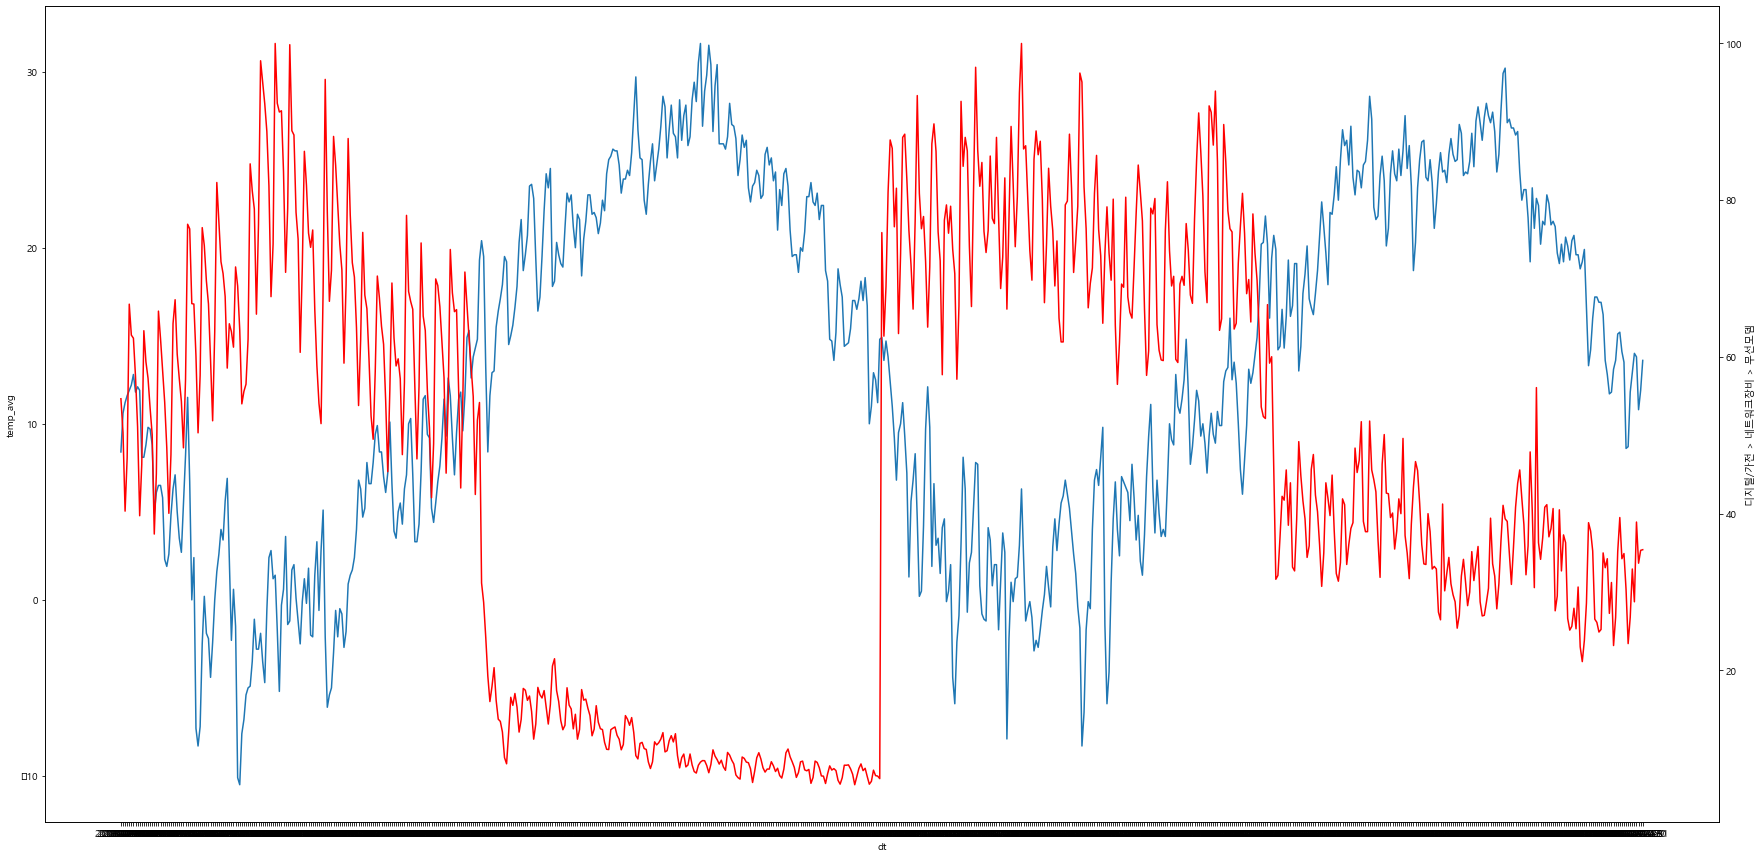

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='dt', y=weatherShop_allP['temp_avg'], data=weatherShop_allP, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='dt', y=weatherShop_allP['디지털/가전 > 네트워크장비 > 무선모뎀'], data=weatherShop_allP, ax=ax2, color='r')
plt.show()

In [28]:
print(weatherShop_allP['디지털/가전 > 네트워크장비 > 무선모뎀'])

0      54.6548
1      50.3691
2      40.3076
3      47.1565
4      66.7259
        ...   
726    28.7356
727    38.9162
728    33.6617
729    35.3038
730    35.3859
Name: 디지털/가전 > 네트워크장비 > 무선모뎀, Length: 731, dtype: float64


# - 강수량과 일조량의 영향력

In [29]:
display(weatherShop_allP.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,wf_bin,dl_bin
0,서울특별시,2018-11-01,8.4,2.5,15.2,0.0,3.6,1.3,-1.1,53.4,...,54.0078,85.6928,10.35590,61.4510,27.0211,61.7787,24.1213,41.4314,0,6
1,서울특별시,2018-11-02,10.6,4.0,19.0,0.0,2.5,1.1,1.2,54.9,...,43.0709,70.4585,9.96976,53.9569,23.7496,55.5679,22.7592,38.2272,0,6


<AxesSubplot:>

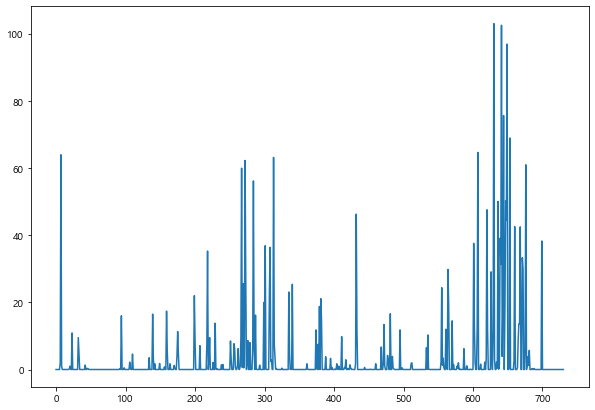

In [30]:
plt.figure(figsize=(10, 7))
weatherShop_allP['amount_of_rain'].plot()

<AxesSubplot:>

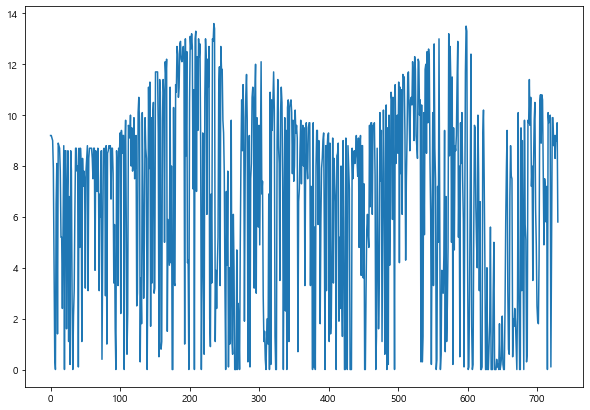

In [31]:
plt.figure(figsize=(10, 7))
weatherShop_allP['daylight_hour'].plot()

In [32]:
# 강수량 범주화
def get_category(amount_of_rain):
    cat = ''
    if amount_of_rain == 0: cat = 0
    elif amount_of_rain <=1: cat = 1
    elif amount_of_rain <=4: cat = 4
    elif amount_of_rain <=15: cat = 10
    else : cat = 11
    return cat

weatherShop_allP['wf_bin'] = weatherShop_allP['amount_of_rain'].apply(lambda x : get_category(x))

weatherShop_allP.groupby('wf_bin').count()

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,dl_bin
wf_bin,,,,,,,,,,,,,,,,,,,,,
0,529,529,529,529,529,529,529,529,529,529,...,529,529,529,529,529,529,529,529,529,529
1,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
4,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
10,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
11,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [33]:
# 일조량 범주화
bin_names = [x for x in range(0, 10)]

# bins
count, bin_dividers = np.histogram(weatherShop_allP['daylight_hour'], bins=10)
print(count, bin_dividers) 


weatherShop_allP['dl_bin'] = pd.cut(x=weatherShop_allP['daylight_hour'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 


[128  40  52  48  40  92 138  98  58  37] [ 0.    1.36  2.72  4.08  5.44  6.8   8.16  9.52 10.88 12.24 13.6 ]


In [34]:
# 강수량, 일조량 범주별 평균
grouped_wf_bin = weatherShop_allP.groupby('wf_bin')
grouped_dl_bin = weatherShop_allP.groupby('dl_bin')

# grouped.agg('mean') 
grouped_wf_bin_mean = grouped_wf_bin.agg('mean')
grouped_dl_bin_mean = grouped_dl_bin.agg('mean')
display(grouped_wf_bin_mean)
display(grouped_dl_bin_mean)

,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
wf_bin,,,,,,,,,,,,,,,,,,,,,
0,12.206616,7.651040,17.547448,0.000000,4.350473,2.020416,2.132325,53.251040,9.432514,1008.006049,...,70.889658,57.801789,66.622806,69.024356,57.168517,70.502196,37.358433,71.800885,49.772101,50.635411
1,13.184615,9.861538,16.951923,0.407692,4.638462,2.273077,6.536538,66.034615,12.888462,1004.663462,...,72.060494,60.476290,68.635188,68.977313,58.775983,73.161444,41.100319,72.423798,53.444858,53.201129
4,16.180000,12.980000,20.107273,2.234545,5.052727,2.389091,10.323636,70.925455,15.036364,1002.127273,...,70.225416,59.673598,67.436116,67.177916,57.977891,71.009965,37.771915,69.176587,52.368935,55.148967
10,16.944681,14.110638,20.710638,8.936170,4.563830,2.195745,12.497872,77.153191,16.734043,1000.391489,...,74.529583,62.755449,72.930868,71.627798,64.316281,73.699685,39.390074,72.359683,55.466830,54.050377
11,20.354167,18.231250,23.095833,40.606250,5.245833,2.450000,17.906250,87.360417,22.302083,997.454167,...,75.515867,64.743662,75.493940,73.587287,63.315460,75.181077,40.787796,71.224387,53.020590,55.819427


,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,wf_bin
dl_bin,,,,,,,,,,,,,,,,,,,,,
0,16.366406,13.985156,19.160156,14.916406,4.554688,2.225000,11.961719,77.229687,16.792969,1001.853906,...,61.505309,71.987455,72.371128,60.949717,74.488466,40.323491,72.402948,52.540309,54.638078,6.054688
1,15.302500,12.277500,18.942500,4.987500,4.357500,2.065000,10.127500,72.800000,15.867500,1004.330000,...,59.620840,68.965732,71.105125,59.391607,71.608095,38.424953,70.237647,49.893453,51.562873,3.300000
2,13.778846,10.305769,18.025000,3.082692,4.305769,1.976923,6.584615,63.873077,12.632692,1003.657692,...,56.280062,65.979813,66.939265,55.015817,70.535146,37.044898,69.245529,50.758933,50.929558,2.134615
3,15.156250,11.208333,19.952083,2.675000,4.729167,2.043750,8.125000,64.904167,13.018750,1003.833333,...,59.407942,67.973744,69.380271,57.690119,70.437210,39.275569,70.159863,50.098260,53.656723,1.895833
4,12.402500,8.265000,17.287500,0.772500,4.390000,2.132500,3.947500,58.370000,10.510000,1007.142500,...,58.425078,65.500400,68.084467,57.413323,72.114050,38.777575,71.965588,52.241165,52.014437,0.825000
5,12.448913,7.989130,17.881522,0.508696,4.222826,1.926087,3.255435,56.206522,10.292391,1007.946739,...,58.392585,66.683352,69.861630,55.346454,70.194159,37.393887,72.411275,49.806677,50.655105,0.760870
6,6.905072,2.552174,12.262319,0.116667,4.444928,2.087681,-3.745652,49.757971,6.743478,1011.773188,...,53.934782,64.087170,69.462038,49.950697,71.300396,37.003479,71.708599,49.350494,49.636322,0.181159
7,14.170408,9.295918,19.906122,0.196939,4.551020,2.156122,3.987755,53.343878,10.180612,1007.696939,...,64.042978,69.287571,68.582579,66.619942,70.786999,39.209813,73.064892,51.848379,52.062980,0.275510
8,15.720690,10.237931,21.793103,0.044828,4.858621,2.217241,3.251724,46.977586,9.543103,1004.518966,...,60.452434,67.840878,67.085491,63.549252,69.012095,35.543221,71.905005,51.376938,51.942352,0.103448


In [35]:
grouped_wf_bin_mean = grouped_wf_bin_mean.reset_index()
grouped_wf_bin_mean['wf_bin'] = grouped_wf_bin_mean['wf_bin'].astype('int')

grouped_dl_bin_mean = grouped_dl_bin_mean.reset_index()
grouped_dl_bin_mean['dl_bin'] = grouped_dl_bin_mean['dl_bin'].astype('int')


In [36]:
# 필요 컬럼만 남김
grouped_wf_bin_mean.columns.tolist()

dropColList = ['temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']

f_grouped_wf_bin_mean = grouped_wf_bin_mean.drop(dropColList, axis=1)
f_grouped_dl_bin_mean = grouped_dl_bin_mean.drop(dropColList, axis=1)


display(f_grouped_wf_bin_mean)
display(f_grouped_dl_bin_mean)

,wf_bin,temp_avg,daylight_hour,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 리모델링,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
0,0,12.206616,8.046503,69.703865,68.021281,67.362560,65.879829,8.869106,61.689171,60.853678,...,70.889658,57.801789,66.622806,69.024356,57.168517,70.502196,37.358433,71.800885,49.772101,50.635411
1,1,13.184615,4.286538,68.392871,64.915690,64.874037,64.666308,5.525615,57.339083,58.767537,...,72.060494,60.476290,68.635188,68.977313,58.775983,73.161444,41.100319,72.423798,53.444858,53.201129
2,4,16.180000,3.496364,66.523605,63.996055,65.123582,64.048200,5.841756,55.982520,58.876325,...,70.225416,59.673598,67.436116,67.177916,57.977891,71.009965,37.771915,69.176587,52.368935,55.148967
3,10,16.944681,2.165957,72.134491,70.932883,71.188817,69.206700,8.523581,65.393711,64.532581,...,74.529583,62.755449,72.930868,71.627798,64.316281,73.699685,39.390074,72.359683,55.466830,54.050377
4,11,20.354167,0.922917,70.410083,69.129727,69.766552,65.359746,19.504494,60.671458,63.533294,...,75.515867,64.743662,75.493940,73.587287,63.315460,75.181077,40.787796,71.224387,53.020590,55.819427


,dl_bin,temp_avg,daylight_hour,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 리모델링,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,...,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,wf_bin
0,0,16.366406,0.309375,69.647705,67.562339,68.225770,66.063676,12.328641,60.247170,61.707994,...,61.505309,71.987455,72.371128,60.949717,74.488466,40.323491,72.402948,52.540309,54.638078,6.054688
1,1,15.302500,1.977500,71.161975,67.888138,66.350578,66.918967,17.168453,60.506545,58.992640,...,59.620840,68.965732,71.105125,59.391607,71.608095,38.424953,70.237647,49.893453,51.562873,3.300000
2,2,13.778846,3.330769,67.098975,66.391567,65.961750,65.281367,6.624265,61.750156,61.025119,...,56.280062,65.979813,66.939265,55.015817,70.535146,37.044898,69.245529,50.758933,50.929558,2.134615
3,3,15.156250,4.777083,68.044773,64.997571,65.146502,64.968883,9.747010,56.598342,58.266371,...,59.407942,67.973744,69.380271,57.690119,70.437210,39.275569,70.159863,50.098260,53.656723,1.895833
4,4,12.402500,6.027500,66.809288,63.664417,63.858665,64.825247,9.438532,53.677882,58.058333,...,58.425078,65.500400,68.084467,57.413323,72.114050,38.777575,71.965588,52.241165,52.014437,0.825000
5,5,12.448913,7.567391,69.577743,67.492311,66.452872,66.316345,8.903185,60.569930,60.622858,...,58.392585,66.683352,69.861630,55.346454,70.194159,37.393887,72.411275,49.806677,50.655105,0.760870
6,6,6.905072,8.876812,68.792781,66.366587,64.614709,66.625588,6.016063,59.419801,58.730730,...,53.934782,64.087170,69.462038,49.950697,71.300396,37.003479,71.708599,49.350494,49.636322,0.181159
7,7,14.170408,10.109184,72.623538,70.778224,71.036796,65.063168,14.853545,62.496351,63.568813,...,64.042978,69.287571,68.582579,66.619942,70.786999,39.209813,73.064892,51.848379,52.062980,0.275510
8,8,15.720690,11.539655,71.565822,71.040247,71.135307,65.287138,1.337738,67.338534,63.869781,...,60.452434,67.840878,67.085491,63.549252,69.012095,35.543221,71.905005,51.376938,51.942352,0.103448
9,9,20.551351,12.821622,67.757949,70.916765,72.120295,65.631773,0.000000,72.178103,64.898543,...,56.511673,69.793524,65.592454,60.699935,67.805781,34.447954,69.201954,49.526581,49.187776,0.000000


In [37]:
f_grouped_wf_bin_mean_corr = f_grouped_wf_bin_mean.corr()
f_grouped_dl_bin_mean_corr = f_grouped_dl_bin_mean.corr()

# f_grouped_wf_bin_mean_corr.to_csv("./data/f_grouped_wf_bin_mean_corr.csv")
# f_grouped_dl_bin_mean_corr.to_csv("./data/f_grouped_dl_bin_mean_corr.csv")

In [38]:
dropColList = ['city','temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', 'daylight_hour', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']
f_weathervsproduct = weatherShop_allP.drop(dropColList, axis = 1)
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('wf_bin').count())
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('dl_bin').count())

        dl_bin
wf_bin        
0          529
1           52
4           55
10          47
11          48
        wf_bin
dl_bin        
0          128
1           40
2           52
3           48
4           40
5           92
6          138
7           98
8           58
9           37


/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


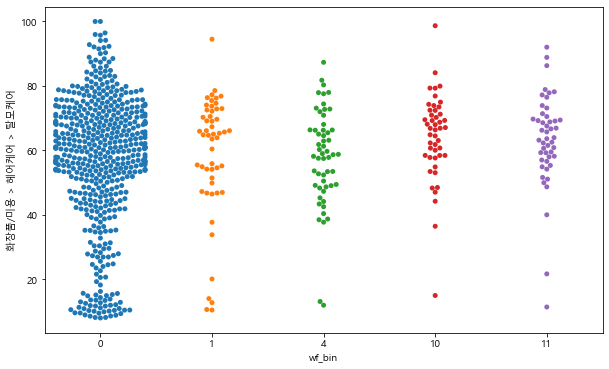

In [39]:
# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="wf_bin",        #x축 변수
              y="화장품/미용 > 헤어케어 > 탈모케어",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

In [40]:
# import numpy as np
# from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# one_hot = LabelBinarizer()
# one_hot.fit_transform(f_weathervsproduct.wf_bin)
# one_hot.classes_

dummy_wf_bin = pd.get_dummies(f_weathervsproduct.wf_bin)
dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']


dummy_dl_bin = pd.get_dummies(f_weathervsproduct.dl_bin)
dummy_dl_bin.columns = ['dl'+ str(z) for z in range(0,10)]



In [41]:
f_weathervsproduct_d = pd.concat([dummy_wf_bin, dummy_dl_bin, f_weathervsproduct], axis=1)
# f_weathervsproduct_d.loc[:,['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'wf_bin']]

In [42]:
# 주말처리 토일월과 그외

import datetime
import time

# 0:월 5:토 6:일
def get_week(dt):
    cat = ''
    if pd.to_datetime(dt).weekday() == 5 : cat = 1
    elif pd.to_datetime(dt).weekday() == 6 : cat = 1
    elif pd.to_datetime(dt).weekday() == 4 : cat = 1
    elif pd.to_datetime(dt).weekday() == 0 : cat = 1        
    else : cat = 0
    return cat

f_weathervsproduct_d['wk_bin'] = f_weathervsproduct_d['dt'].apply(lambda x : get_week(x))
f_weathervsproduct_d[['dt','wk_bin']]


dummy_wk_bin = pd.get_dummies(f_weathervsproduct_d.wk_bin)
dummy_wk_bin.columns = ['wk'+ str(z) for z in range(0,2)]
dummy_wk_bin
f_weathervsproduct_d = pd.concat([f_weathervsproduct_d, dummy_wk_bin], axis=1)

In [43]:
# f_weathervsproduct_d.columns.tolist()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'dl9', 'temp_avg', 'wk0', 'wk1']
# xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg', 'wk0', 'wk1']
# xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'temp_avg']
# xlist = ['dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg']
X=f_weathervsproduct_d[xlist]
y=f_weathervsproduct_d["가구/인테리어 > DIY자재/용품 > 가구부속품"]


# 설명 변수 데이터를 정규화(normalization)
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)

# (1) train, test 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
 

훈련 데이터:  (511, 18)
검증 데이터:  (220, 18)


In [45]:
# (2) 다중회귀분석 모형
lr = LinearRegression()  
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('결정계수(R-제곱): ', r_square)
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

결정계수(R-제곱):  0.19414910233488458
X 변수의 계수 a:  [-0.82527293 -1.9329797  -1.80058445  4.41681185  0.14202523 -0.66966111
 -2.49078309 -2.19081525 -2.43556415 -2.42644042 -1.79049465  1.60371248
  4.36150037  3.54620934  2.4923365   0.43953333  2.77809799 -2.77809799]
상수항 b:  62.1327726700992


/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


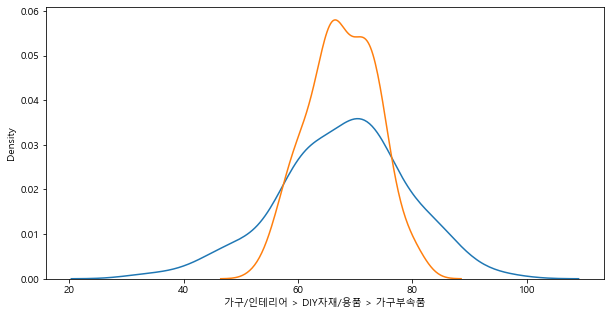

In [46]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def runLinearRegression(xlist, data): 
    df = pd.DataFrame()
    ydata = data.drop(xlist + ['dt', 'wf_bin', 'dl_bin', 'wk_bin'], axis=1)
    
    for colname in ydata.columns.tolist():

        X=data[xlist]
        y=data[colname]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)
#        print('[' + colname + ']')
#         print('[' + colname + ']', '결정계수(R-제곱) :', r_square, '상수항 b: ', lr.intercept_)
#         print('X 변수의 계수 a: ', lr.coef_)
        df = df.append({'productName' : colname , 'R_square' : r_square, 'Xa' : lr.coef_, 'b' : lr.intercept_} , ignore_index=True)
    return df





xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'dl9', 'temp_avg', 'wk0', 'wk1']

allrunLinearRegression = runLinearRegression(xlist, f_weathervsproduct_d)
allrunLinearRegression.to_csv("./data/allrunLinearRegression_201811_202010.csv")


In [99]:
print(allrunLinearRegression.Xa[0][1])

0.09329978457056412


SVR()
결정계수(R-제곱):  0.6395135639191282
SGDRegressor()
결정계수(R-제곱):  0.4670140010720445
BayesianRidge()
결정계수(R-제곱):  0.5897065425228817
LassoLars()
결정계수(R-제곱):  0.025846761246739014
ARDRegression()
결정계수(R-제곱):  0.6042296432317487
PassiveAggressiveRegressor()
결정계수(R-제곱):  0.40760606713358083
TheilSenRegressor(max_subpopulation=10000)
결정계수(R-제곱):  0.5855958685521867
LinearRegression()
결정계수(R-제곱):  0.5881536265856617


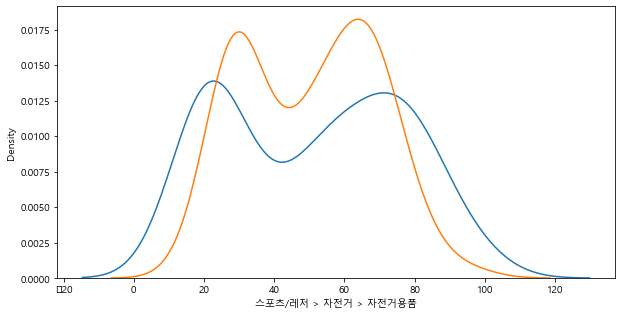

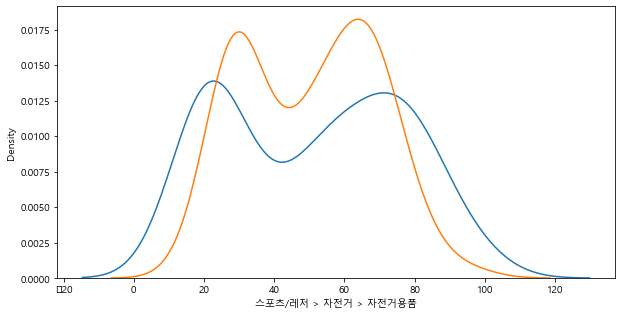

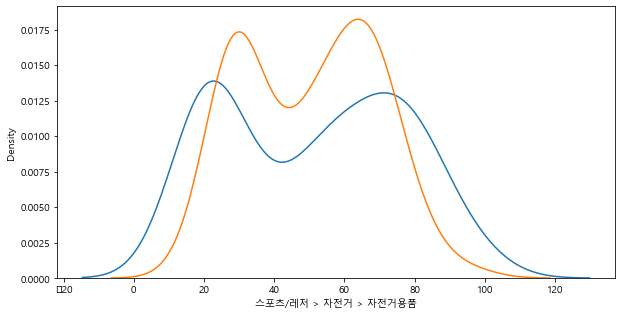

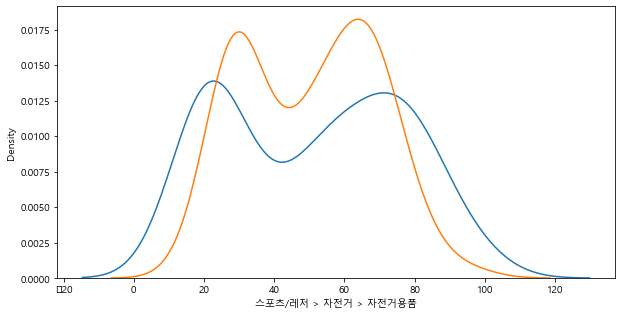

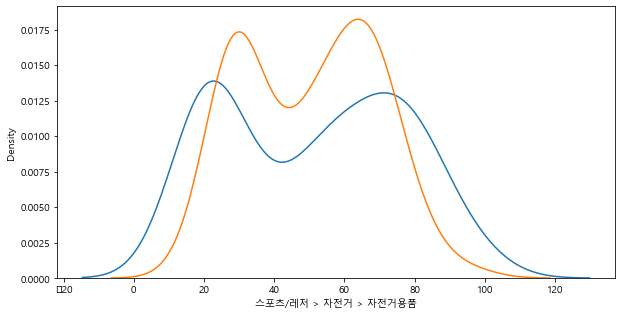

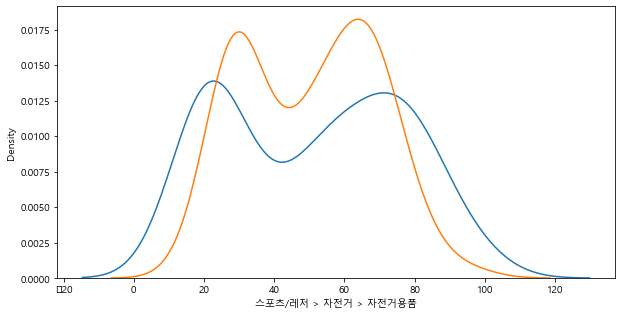

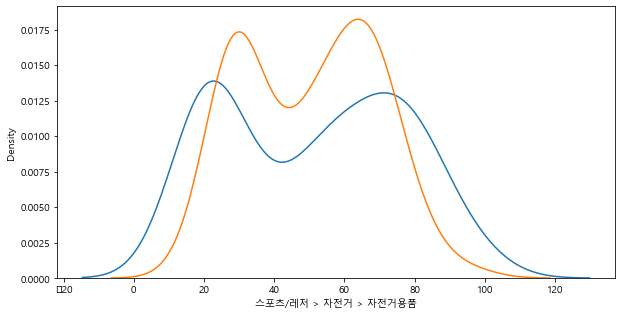

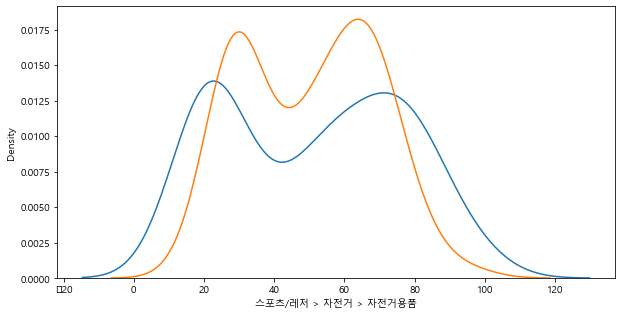

In [100]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    # print(clf.predict(predictionData),'\n')
    r_square = clf.score(X_test, y_test)
    print('결정계수(R-제곱): ', r_square)
    
    y_hat = lr.predict(X_test)

    plt.figure(figsize=(10, 5))
    ax1 = sns.distplot(y_test, hist=False, label="y_test")
    ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()    